# Description: example
## framework: pytorch

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Selection

In [42]:
# settings
source = './mnist.csv'
split_train, split_test, split_validation = 60, 20, 20
label_colname = 'label'

In [43]:
data = pd.read_csv(source, encoding='utf_8', parse_dates=True)

In [44]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
X,y = data.drop([label_colname], axis = 1), data[label_colname]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split_train / 100, test_size = split_test / 100, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=(100 - split_validation) / 100)

# Preprocessing

In [47]:
# TODO

# Transformation

In [48]:
X_train = X_train / 255.
X_test = X_test / 255.

# Data mining

In [49]:
import keras.models as km
import keras.layers as kl

In [50]:
def Network(nbIn,nbOut):
    model = km.Sequential()
    model.add(kl.Dense(int(nbIn/2), activation='tanh', input_shape=(nbIn,)))
    model.add(kl.Dense(nbOut, activation='softmax'))
    return model

In [51]:
nbIn = X_train.shape[1]
nbOut = 1

neuralNetwork = Network(nbIn,nbOut)
neuralNetwork.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 392)               307720    
                                                                 
 dense_5 (Dense)             (None, 1)                 393       
                                                                 
Total params: 308,113
Trainable params: 308,113
Non-trainable params: 0
_________________________________________________________________


#### Loss/optimizers catalog

In [52]:
supported_loss_functions = {
    'mse': 'mse',
    'cross_entropy': 'categorical_crossentropy',
}
supported_optimizers = {
    'adam': 'Adam',
    'sgd': 'SGD',
}

In [53]:
selected_loss_function = 'mse'
selected_optimizer = 'sgd'
learning_rate = 0.003
nbEpochs = 100
batch_size = 128

In [54]:
neuralNetwork.compile(
    loss=supported_loss_functions[selected_loss_function],
    optimizer=supported_optimizers[selected_optimizer],
    metrics=['accuracy']
)

In [55]:
history = neuralNetwork.fit(X_train, y_train,
                            batch_size=batch_size,
                            epochs=nbEpochs,
                            verbose=1)

Epoch 1/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 2/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 3/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 4/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 5/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 6/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 7/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 8/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 9/100
263/263 [==============================] - 1s 4ms/step - loss: 20.1934 - accuracy: 0.1112
Epoch 10/100
263/263 [==============================] - 1s 4ms/step - loss: 20.193

# Validation

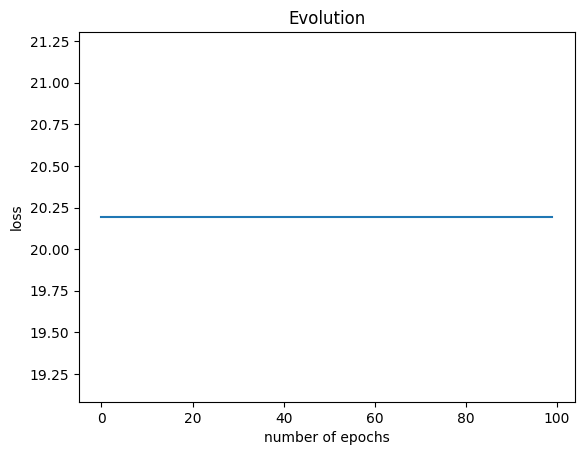

In [56]:
fig, ax = plt.subplots()
x = np.arange(len(history.history['loss']))
ax.plot(x, history.history['loss'])
ax.set(xlabel='number of epochs', ylabel='loss', title='Evolution')
plt.show()

2/2 [==============================] - 0s 4ms/step


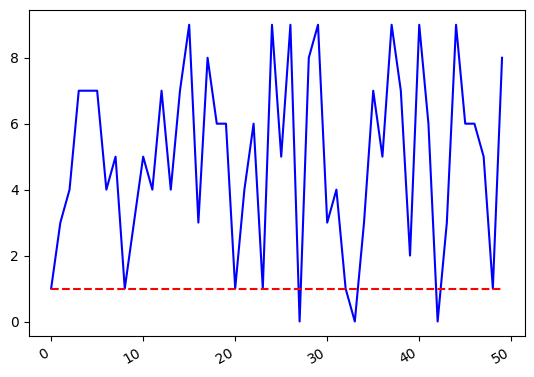

In [57]:
ax = plt.gca()
output = neuralNetwork.predict(X_train.values[:50])
plt.plot(np.arange(y_train.values[:50].size), y_train.values[:50], '-', label='True data', color='b')
plt.plot(np.arange(output[:50].size), output, '--', label='Predictions', color='r')
plt.gcf().autofmt_xdate()
plt.show()

# Knowledge

The conclusion